In [5]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [6]:
# summary of data
print('data size = ', digits.data.shape)
print('target size = ', digits.target.shape)
print(digits.DESCR)

data size =  (1797, 64)
target size =  (1797,)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels 

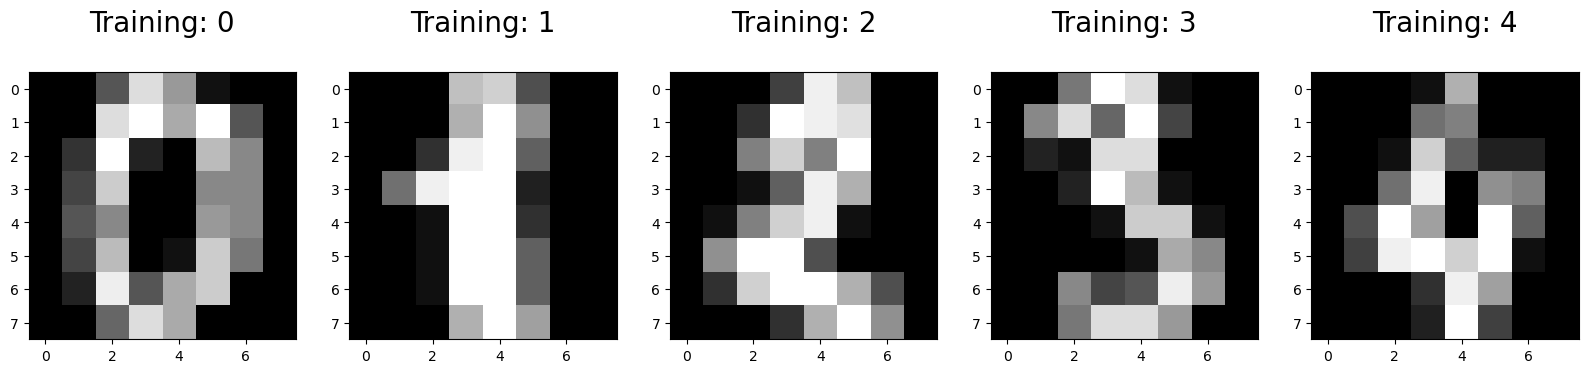

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# show examples of dataset
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [17]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=8)
print(X_train[256], y_train[256])

[ 0.  0.  2. 16. 10.  0.  0.  0.  0.  0.  4. 16. 16.  5.  0.  0.  0.  0.
  8. 16. 16.  3.  0.  0.  0.  0.  9. 16. 16.  3.  0.  0.  0.  0.  8. 16.
 16.  3.  0.  0.  0.  0.  8. 16. 16.  1.  0.  0.  0.  0.  5. 16. 14.  0.
  0.  0.  0.  0.  1. 12. 16.  3.  0.  0.] 1


In [300]:
# 2 batch gradient descent (GD) for Logistic regression
def softmax(z):
    # apply trick
    z -= np.max(z, axis=1, keepdims = True)       # minus the largest element in each row(axis=1)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims = True)

def cross_entropy_loss(Y, y_pred, W, reg_lambda):
    number_of_samples = Y.shape[0]
    # print(y_pred[np.arange(number_of_samples), y_train])
    log_likelihood = np.multiply(np.log(y_pred), Y)         # multiply each element with one-hot encoded Y
    # print(log_likelihood)
    loss = - np.sum(log_likelihood) / number_of_samples
    # Frobenius norm
    loss += reg_lambda / 2 * np.linalg.norm(W, 'fro')**2
    return loss
    
def LogisticRegression_GD(X_train, y_train, learning_rate):
    #TODO
    number_of_samples = X_train.shape[0]
    number_of_features = X_train.shape[1]
    number_of_classes = 10
    Y = np.zeros((number_of_samples, number_of_classes))
    W = np.zeros((number_of_features, number_of_classes))       # initialization of W and b.
    b = np.zeros((1, number_of_classes))
    Y[np.arange(number_of_samples), y_train] = 1   # generate one-hot encoding for Y
    # print(Y)
    losses = []

    # print(number_of_samples)
    # print(number_of_features)
    
    max_epochs = 500
    epsilon = 1e-4
    reg_lambda = 0.1
    
    for i in range(max_epochs):
        # Compute z
        z = X_train.dot(W) + b
        # print(z)
        
        # Compute predicted probabilities using softmax
        y_pred = softmax(z)
        
        # gradient
        gradient_W = (X_train.T @ (y_pred - Y)) / number_of_samples + reg_lambda * W
        gradient_b = np.sum(y_pred - Y, axis = 0) / number_of_samples
        
        # update W, b
        W -= learning_rate * gradient_W
        b -= learning_rate * gradient_b.reshape(1,-1)
        
        # Compute loss
        loss = cross_entropy_loss(Y, y_pred, W, reg_lambda)
        losses.append(loss)

        # print(f'Epoch {i}: Loss = {loss}')
        # Check for convergence
        if i > 0 and abs(losses[i] - losses[i-1]) < epsilon:
            break
    
    return W, b, losses

def prediction(X, W, b):
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return np.argmax(y_pred, axis = 1)
    
    


---------------------------------------
learning rate = 0.05
training precision = 0.9799554565701559
test precision = 0.9666666666666667
---------------------------------------
learning rate = 0.005
training precision = 0.9747587230883444
test precision = 0.9644444444444444
---------------------------------------
learning rate = 0.01
training precision = 0.9769858945805494
test precision = 0.9666666666666667


Text(0, 0.5, 'loss')

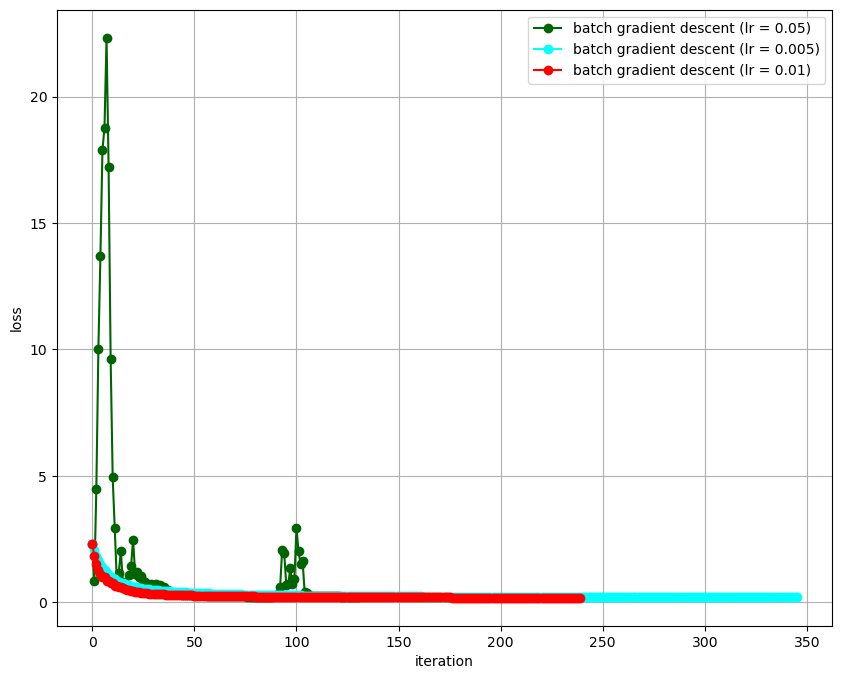

In [302]:
# evaluation of different learning rate
import matplotlib.pyplot as plt
learning_rate = [5.0e-2, 5.0e-3, 1.0e-2]
cl = ['darkgreen', 'cyan', 'red']
fig, ax = plt.subplots(figsize=(10, 8))
for i in range(len(learning_rate)):
    
    print('---------------------------------------')
    print('learning rate =', learning_rate[i])
    
    W, b, loss_GD = LogisticRegression_GD(X_train, y_train, learning_rate[i])
    # print(W)
    # print(b)
    # print(loss_GD)
    
    #TODO
    y_train_hat = prediction(X_train, W, b)
    prec_train = np.sum(y_train_hat == y_train) / y_train_hat.size
    print('training precision =', prec_train)

    #TODO
    y_test_hat = prediction(X_test, W, b)
    prec_test = np.sum(y_test_hat == y_test) / y_test_hat.size
    print('test precision =', prec_test)
    
    plt.plot(loss_GD, c = cl[i], ls = '-', marker = 'o', label = 'batch gradient descent (lr = ' + str(learning_rate[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('iteration')
plt.ylabel('loss')

In [304]:
# 4 stochastic gradient descent (SGD) for Logistic regression
def softmax(z):
    z -= np.max(z, axis=1, keepdims = True)      
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims = True)

def cross_entropy_loss(Y, y_pred, W, reg_lambda):
    number_of_samples = Y.shape[0]
    log_likelihood = np.multiply(np.log(y_pred), Y)
    loss = -np.sum(log_likelihood) / number_of_samples
    loss += reg_lambda / 2 * np.linalg.norm(W, 'fro')**2
    return loss
    
def LogisticRegression_SGD(X, y, batch_size, lr=1.0e-2, eta=2.0e-1, eps = 1.0e-4, max_epoch=500):
    
    #TODO: initialization
    notstop = True
    epoch = 0
    loss= []    

    reg_lambda = eta
    number_of_samples = X.shape[0]
    number_of_features = X.shape[1]
    number_of_classes = 10
    W = np.zeros((number_of_features, number_of_classes))
    b = np.zeros((1, number_of_classes))
    Y = np.zeros((number_of_samples, number_of_classes))
    Y[np.arange(number_of_samples), y] = 1
    # optimization loop	
    while notstop and epoch < max_epoch:
        
        #TODO: SGD of each epoch
        shuffle_indices = np.random.permutation(np.arange(number_of_samples))
        X_shuffled = X[shuffle_indices]
        y_shuffled = y[shuffle_indices]
       
        # for every mini-batch
        for i in range(0, number_of_samples, batch_size):
            X_batch = X_shuffled[i:i+batch_size] 
            y_batch = y_shuffled[i:i+batch_size]
            Y_batch = np.eye(number_of_classes)[y_batch]  # one-hot encoding
            # print(f"Shape of X_batch: {X_batch.shape}")
            # print(f"Shape of Y_batch: {Y_batch.shape}")

            if X_batch.shape[0] != batch_size:        # discard 
                continue
            


            z = X_batch.dot(W) + b
            y_pred = softmax(z)

            gradient_W = (X_batch.T @ (y_pred - Y_batch)) / batch_size + reg_lambda * W
            # print(W.shape)
            # print(gradient_W.shape)
            gradient_b = np.sum(y_pred - Y_batch, axis = 0) / batch_size 

            W -= lr * gradient_W
            b -= lr * gradient_b

        # calculate the loss for current epoch
        cur_z = X.dot(W) + b
        cur_y_pred = softmax(cur_z)
        c_loss = cross_entropy_loss(Y, cur_y_pred, W, reg_lambda)
        loss.append(c_loss)

        # print(f"Epoch: {epoch}, Loss: {c_loss}")
    
        # half lr if not improving in 10 epochs
        if epoch > 10:
            if loss[epoch - 10] <= loss[epoch] - eps:
                lr *= 0.5
                print('reduce learning rate to', lr)
        
        # stop if not improving in 20 epochs
        if epoch > 20:
            if loss[epoch - 20] <= loss[epoch] - eps or abs(loss[epoch] - loss[epoch-1]) <= eps:                
                notstop = False
                break
            
        epoch += 1
        
        #TODO: W and b

    return (W, b, loss)

---------------------------------------
batch_size = 10
training precision = 0.9888641425389755
test precision = 0.9711111111111111
---------------------------------------
batch_size = 50
training precision = 0.9792130660727543
test precision = 0.9733333333333334
---------------------------------------
batch_size = 100
training precision = 0.9836674090571641
test precision = 0.9711111111111111


Text(0, 0.5, 'loss')

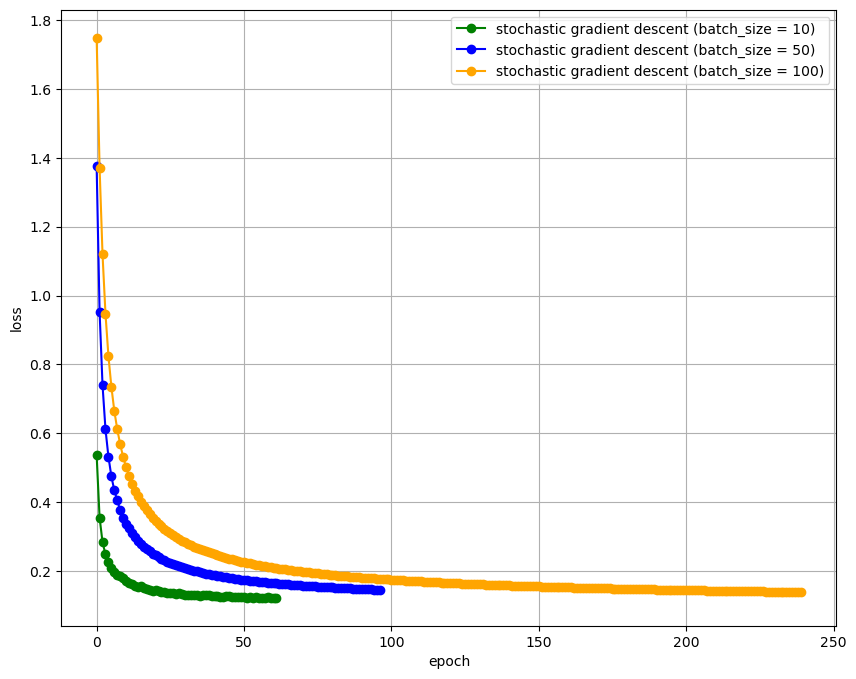

In [306]:
# evaluation of different batch size
bs = [10, 50, 100]
cl = ['green', 'blue', 'orange']
# TODO: different learning rate for different batch size
lr = [0.001, 0.001, 0.001]
fig, ax = plt.subplots(figsize=(10, 8))

for i in range(len(bs)):
    
    print('---------------------------------------')
    print('batch_size =', bs[i])
    W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, bs[i], lr[i], eta = 0.05, eps = 1.0e-4, max_epoch = 500)
    
    #TODO
    y_train_hat = prediction(X_train, W, b)
    prec_train = np.sum(y_train_hat == y_train) / y_train_hat.size
    print('training precision =', prec_train)

    #TODO
    y_test_hat = prediction(X_test, W, b)
    prec_test = np.sum(y_test_hat == y_test) / y_test_hat.size
    print('test precision =', prec_test)
    
    plt.plot(loss_SGD, c = cl[i], ls = '-', marker = 'o', label = 'stochastic gradient descent (batch_size = ' + str(bs[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

---------------------------------------
batch_size = 10
training precision = 0.9762435040831478
test precision = 0.9644444444444444
---------------------------------------
batch_size = 50
training precision = 0.9829250185597624
test precision = 0.9733333333333334
---------------------------------------
batch_size = 100
training precision = 0.9836674090571641
test precision = 0.9733333333333334


Text(0, 0.5, 'loss')

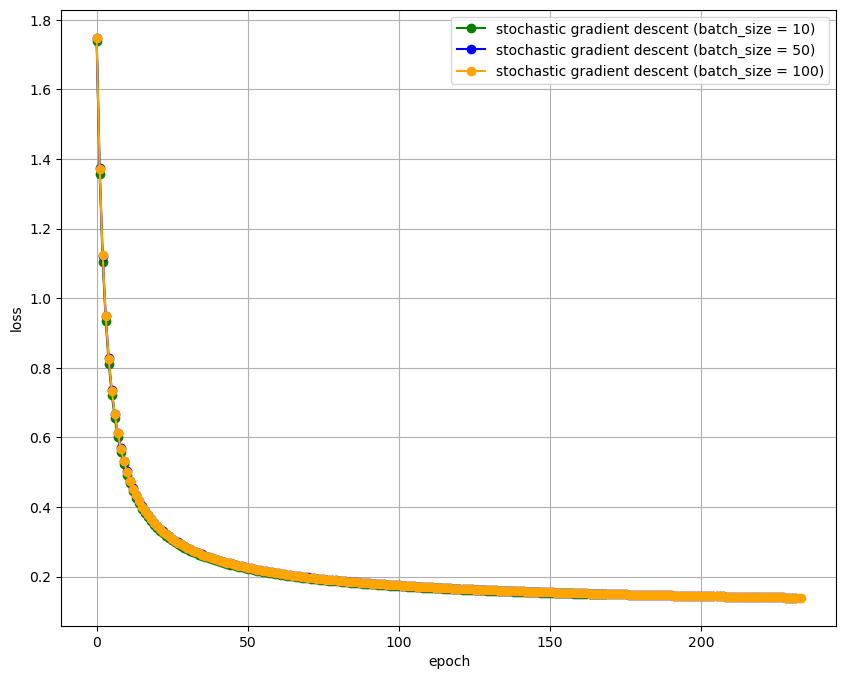

In [310]:
# evaluation of different batch size
bs = [10, 50, 100]
cl = ['green', 'blue', 'orange']
# TODO: different learning rate for different batch size
lr = [0.0001, 0.0005, 0.001]
fig, ax = plt.subplots(figsize=(10, 8))

for i in range(len(bs)):
    
    print('---------------------------------------')
    print('batch_size =', bs[i])
    W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, bs[i], lr[i], eta = 0.05, eps = 1.0e-4, max_epoch = 500)
    
    #TODO
    y_train_hat = prediction(X_train, W, b)
    prec_train = np.sum(y_train_hat == y_train) / y_train_hat.size
    print('training precision =', prec_train)

    #TODO
    y_test_hat = prediction(X_test, W, b)
    prec_test = np.sum(y_test_hat == y_test) / y_test_hat.size
    print('test precision =', prec_test)
    
    plt.plot(loss_SGD, c = cl[i], ls = '-', marker = 'o', label = 'stochastic gradient descent (batch_size = ' + str(bs[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')